# [Implementing Neural Networks with Numpy for Absolute Beginners](https://github.com/SurajDonthi/Neural-Networks-from-Scratch)

## [Part 2: Linear Regression](https://towardsdatascience.com/neural-networks-with-numpy-for-absolute-beginners-part-2-linear-regression-e53c0c7dea3a)  

##### In this tutorial, you will learn to implement Linear Regression for prediction using Numpy in detail and also visualize how the algorithm learns epoch by epoch. In addition to this, you will explore two layer Neural Networks.

In the previous tutorial, you got a very brief overview of the field of AI and learnt about perceptrons. In this tutorial, you will dig very deep into implementing a Linear Perceptron and build upon those concepts to understand Linear Regression.

## Linear Activation Function

Lets assume that there is only one input and bias to the perceptron as shown below:

<img src="https://docs.google.com/drawings/d/e/2PACX-1vQ0sj3f-bHdNDVltSyUEHQqccTNxA9zWCeskyI5pdpbyoWmYODkGc_J_T_8PYdhvUZ5jUJG-XhuU8-D/pub?w=2800&h=2168" alt="Drawing" width="600"/>

The resulting linear output (i.e., the sum) will be $y = m.x + b$. This is the equation of a straight line, as shown in the below figure. 

<img src="http://mathonweb.com/help_ebook/html/equations_1/eqs21.gif" alt="Drawing" width="300"/>

*It must be noted here that when no activation function is used, we can say that the acitvation function is linear.*

This is a **multivariate(multiple variables) linear equation.**

Let us see how this is utilized for predicting the actual output of $y$ in the next section i.e., ***Linear Regression***.

## Linear Regression

Fitting a linear equation on a given set of data in $n$-dimensional space is called **Linear Regression**. The image below shows an example of Linear Regression. 

<img src="https://cdn-images-1.medium.com/max/1600/1*eeIvlwkMNG1wSmj3FR6M2g.gif" alt="Drawing" width="500"/>

In simple words, you try to find the best values of $m$ and $b$ that best fits the set of points as shown in the above figure. When we have obtained the best possible fit, we can predict the y values given x.

A very popular example is the *housing price prediction* problem. In this problem you are given a set of values like the area of the house and the number of rooms etc. as features and you must predict the price of the house given these values.

So the big question is... How does the prediction algorithm work? How does it learn to predict?

Let's learn this on the go!

Let's start importing the required packages.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Set parameters for plotting
params = {'axes.titlesize': 'xx-large',               # Set title size
          'axes.labelsize': 'x-large',                # Set label size
          'figure.figsize': (8, 6)                    # Set a figure Size
}

rcParams.update(params)

You'll use the sklearn dataset generator for creating the dataset. You shall also the sklearn package for splitting the data into training and test data. If you are not aware of sklearn, it is a rich package with many machine learning algorithms. Although, you get prebuilt functions for performing linear regression, you are going to build it from scratch.

For creating the dataset, you must first set a list of hyperparameters $-$ while $m$ and $b$ are parameters, the number of samples, the number of input features, the number of neurons, the learning rate, the number of iterations/epochs for training etc. are called hyperparameters. You shall learn about these hyperparameters as you implement the algorithm.

For now, you shall set the number of training samples, the number of input features, the learning rate and epochs.You shall understand learning rate and epochs in a short while.

In [3]:
# Sample size
M = 200

# No. of input features
n = 1

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 51

Your first task would be to import or generate the data. In this tutorial, you'll generate the dataset using `sklearn`'s `make_regression` function.

For purpose of learning, we shall keep the number of features minimal so that it is easy to visualize.
Hence, you must choose only one feature.

In [4]:
X, y = make_regression(n_samples=M, n_features=n, n_informative=n, n_targets=1, random_state=42, noise=10)

Now, it's time to visualize what the data generator has cooked up!

In [6]:
def plot_graph(X, y):
    # Plot the original set of datapoints
    _ = plt.scatter(X, y, alpha=0.8)
    _ = plt.title('Plot of Datapoints generated')
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    plt.show()

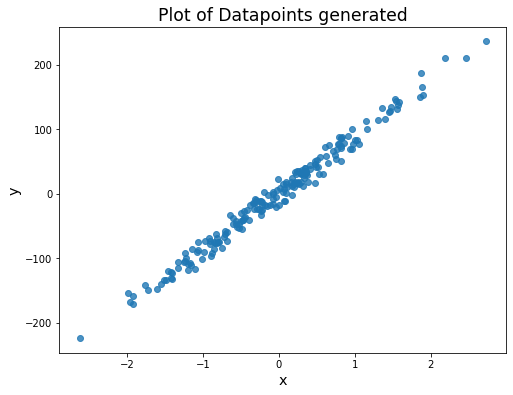

In [7]:
plot_graph(X, y)

Let's check the shape of the vectors for consistency.

In [8]:
print('Shape of vector X:', X.shape)
print('Shape of vector y:', y.shape)

Shape of vector X: (200, 1)
Shape of vector y: (200,)


In [9]:
# Function to reset the sizes 
def reset_sizes(*args):
    return tuple(arg.reshape((arg.shape[0], 1)) for arg in args)

In [10]:
# Reset the size from (200,) -> (200, 1)
X, y = reset_sizes(X, y)
X.shape

(200, 1)

Next you will have to split the dataset into train and test sets, so that you can test the accuracy of the regression model using a part of the dataset once you have trained the model.

Now let's split the data into train set and test set. You shall also reset the sizes so there is no discrepency in doing matrix computations.

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In our case, the training set is 80% and the test set is 20%.  
Let's check the shape of the Train and Test datasets created.

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


As you can see, 80% of the data i.e., 80% of 200 data points is 160 which is correct.

The next step is to randomly generate a line with a random slope and an intercept (bias). The goal is to achieve the best fit for the line.

In [15]:
# Function to generate parameters of the linear regression model, m & b.
def init_params():
    m = np.random.normal(scale=10)
    b = np.random.normal(scale=10)
    return m, b

In [16]:
# Call function to generate paramets
m, b = init_params()

Now, given $m$ & $b$, we can plot the line so generated.

Let's update the function ```plot_graph``` to show the predicted line too.

In [17]:
def plot_graph(dataset, pred_line=None):
    X, y = dataset['X'], dataset['y']
    # Plot the set of datapoints
    _ = plt.scatter(X, y, alpha=0.8)                                
    if(pred_line != None):
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        _ = plt.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        _ = plt.title('Random Line on set of Datapoints')
    else:
        _ = plt.title('Plot of Datapoints')
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    plt.show()

In [18]:
# Function to plot predicted line
def plot_pred_line(X, y, m, b):
    # Generate a set of datapoints on x for creating a line.
    x_line = np.linspace(np.min(X), np.max(X), 10)

    # Calculate the corresponding y with random values of m & b
    y_line = m * x_line + b
    
    dataset = {'X': X, 'y': y}
    
    pred_line = {'x_line': x_line, 'y_line':y_line}
    
    plot_graph(dataset, pred_line)
    
    return 

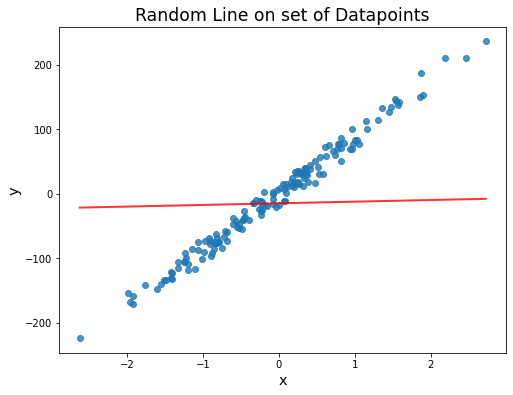

In [19]:
plot_pred_line(X_train, y_train, m, b)

Since the line is now generated, you'll need to predict the values it is producing for a given value of $x$. From this value, all there is to do is to calculate their mean squared error.

Let us predict the values of $y (y_{pred})$ from the parameters $m$ & $b$ given the datapoints $X_{train}$ by defining a function ```forward_prop```

In [20]:
def forward_prop(X, m, b):
    y_pred = m * X + b
    return y_pred

In [21]:
y_pred = forward_prop(X_train, m, b)

## Cost/Loss Function

Now, that you have both the corresding values for $X_{train}$ and the predicted values for $y(y_{pred})$ you'll calculate the Cost/Error/Loss Function. We shall stick to the term Loss. 

For the $Loss$, you must compute the $Mean \space Squared \space Error$ and minimize it.

The $Loss(Mean \space Squared \space Error)$ is:
\begin{equation}
MSE = (y'^{(i)} - y^{(i)})^2
\end{equation}

<br>Summing over all $M$ examples, we obtain the $Cost/Loss \space fn.$ as below:

\begin{equation}
L = \frac{1}{2M}\sum_{i=0}^M(y'^{(i)} - y^{(i)})^2
\end{equation}

Hence, our goal would be to minimize the $Loss$ thereby fitting the curve.

Let us now codify this.

We shall also save each value of $loss$ that will be computed.

In [ ]:
def compute_loss(y, y_pred):
    loss = 1 / 2 * np.mean((y_pred - y)**2)
    
    return loss

In [28]:
losses = []

compute_loss(y_train, y_pred)

4005.265725705774

Lets modify the above ```plot_graph``` function defined above to plot the Loss too.



In [ ]:
def plot_graph(dataset, pred_line=None, losses=None):
    
    plots = 2 if losses!=None else 1
    
    fig = plt.figure(figsize=(8 * plots, 6))
    
    
    X, y = dataset['X'], dataset['y']
    
    ax1 = fig.add_subplot(1, plots, 1)
    ax1.scatter(X, y, alpha=0.8)                                # Plot the original set of datapoints
    
    if(pred_line != None):

        
        x_line, y_line = pred_line['x_line'], pred_line['y_line']
        
        ax1.plot(x_line, y_line, linewidth=2, markersize=12, color='red', alpha=0.8)      # Plot the randomly generated line
        
        ax1.set_title('Predicted Line on set of Datapoints')
    
    else:
        ax1.set_title('Plot of Datapoints generated')
   
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    if(losses!=None):
        ax2 = fig.add_subplot(1, plots, 2)
        ax2.plot(np.arange(len(losses)), losses, marker='o')
        
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.set_title('Loss')

    plt.show()

In [ ]:
def plot_pred_line(X, y, m, b,losses=None):
    
    # Generate a set of datapoints on x for creating a line.
    # We shall consider the range of X_train for generating the line so that the line superposes the datapoints.
    x_line = np.linspace(np.min(X), np.max(X), 10)             
    
    # Calculate the corresponding y with the parameter values of m & b
    y_line = m * x_line + b                                                
    
    plot_graph(dataset={'X': X, 'y': y}, pred_line={'x_line': x_line, 'y_line':y_line}, losses=losses)
    
    return 

You'll shall visualize the line created from the parameters $m$ and $b$.

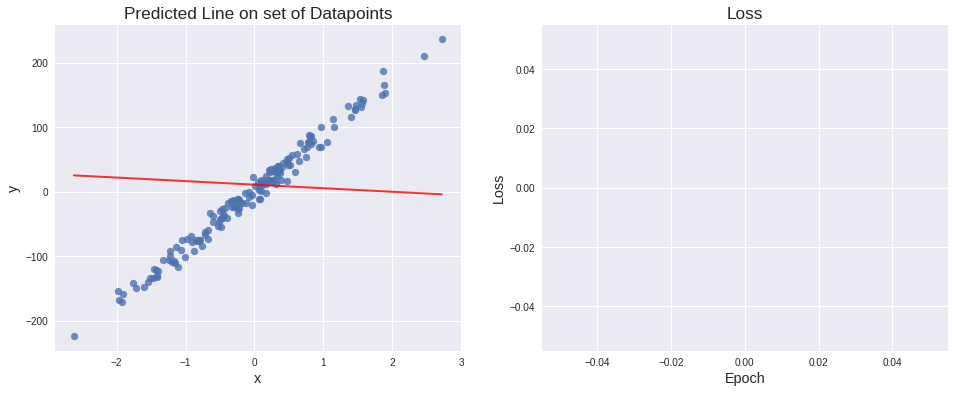

In [31]:
plot_pred_line(X_train, y_train, m, b,losses)

Now that you have computed the loss, let's minimize it.

## Gradient Descent for Linear Regression

Since, $Loss$ is the dependent variable and $m$ & $c$ are the independent variables, we'll have to update m & b so as to find the minimum Loss.

So the next question would be, How can I update the parameters $m$ and $b$?


Let us for instance consider just a single parameter $p$ as shown below and let $t(target)$ be the actual value that has to be predicted.. We see that as $cost$ converges to the minima, the parameter $p$ reaches an optimum value for the minimum $cost$. Let's say the optimum value of $p$ is $a$.

<img src="https://cdn-images-1.medium.com/max/1600/1*pwPIG-GWHyaPVMVGG5OhAQ.gif" alt="Drawing" width="800"/>

Let's gain a bit of intuition as to what the graph is saying.

It is clear from the graph, that as $p$ moves towards $a$, the Cost decreases and as it moves away from it, the cost increase.

<br>
**Now, how can we make $p$ move towards $a$, whether it is on the left or to the right of $a$ as shown in figure?**

Let us consider the $slope$ of the curve. From calculus, we know that the $slope$ of a curve at a point is given by $\frac{\mathrm dy}{\mathrm dx}$(here it is $\frac{\mathrm dL}{\mathrm dp}$ where $L \rightarrow Loss$). From the fig., when $p$ is to the right of $a$, the $slope$ is obviously $-ve$ and when it's to the right, the $slope$ would be $+ve$. But we see that if $p$ is to the left of $a$, some value must be added to $p$. Likewise, some value must subtracted when $p$ is to the right of $a$.

This means that when $slope \rightarrow -ve \implies p = p + (some \space val.)$ and when $slope \rightarrow +ve \implies p = p - (some \space val.)$ to move towards $a$

$\therefore$ We subtract $slope$ itself to $p$. This way, slope is negated so that it could be appropriately added or subtracted.The resulting equation would be, 

\begin{equation}
p = p - slope \\
= p - \dfrac{\mathrm dL}{\mathrm dp} \\
\implies p = p - \mathrm dp \qquad \qquad
\end{equation}

It must also be observed that if the cost is too high, the $slope$ will be too high. Hence, while subtracting the $slope$ from $p$, $p$ value might overshoot $a$. It implies that it is necessary to decrease the value of $slope$ so that $p$ does not overshoot $a$. Therefore, we introduce a dampening factor called $Learning \space Rate (\alpha)$ to the $slope$.

What we finally obtain would be,
\begin{equation}
p = p - \alpha .\mathrm dp \qquad \qquad
\end{equation}

A shown in the figure, the trajectory taken by $p$ against $Cost$ is that of a Bel curve.

This method is called the **Gradient Descent**.

In our case, we use two parameters $m$ and $b$. Therefore, the bel curve would be *3-dimensional* as shown in the below figure.
<img src="https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif" alt="Drawing" width="700"/>

We compute the partial derivative of the loss function w.r.t to the parameters $m$ & $b$ to obtain i.e.,

\begin{equation}
\frac{\partial L}{\partial m} = \partial{m} = \frac{1}{M}.\sum_{i=0}^M\Big(y'^{(i)} - y^{(i)}\Big).x^{(i)}\qquad--(1)
\end{equation}

<br>
\begin{equation}
\& \qquad \qquad \qquad
\end{equation}
<br>

\begin{equation}
\quad \frac{\partial L}{\partial b} = \partial{b} = \frac{1}{M}.\sum_{i=0}^M\Big(y'^{(i)} - y^{(i)}\Big)\qquad\qquad--(2)
\end{equation}

In [ ]:
def grad_desc(m, b, X_train, y_train, y_pred):
    dm = np.mean((y_pred - y_train) * X_train)
    db = np.mean(y_pred - y_train)
    
    return dm, db

### Updating the parameters

\begin{equation}
\qquad m = m - \alpha . \partial{m} \qquad\qquad\qquad\qquad--(3)\\
\qquad\space\space b = b - \alpha . \partial{b} \qquad\qquad\qquad\qquad\quad--(4)
\end{equation}

In [ ]:
def update_params(m, b, dm, db, l_r):
    
    m -= l_r * dm
    b -= l_r * db
    
    return m, b

Let us define a function ```back_prop```, which calls both ```grad_desc``` and ```update_params```.

In [ ]:
def back_prop(X_train, y_train, y_pred, m, b, l_r):

    dm, db = grad_desc(m, b, X_train, y_train, y_pred)
    
    m, b = update_params(m, b, dm, db, l_r)

    return m, b

We shall now combine and call all the functions at once to see how the algorithm works.

We shall again set and tune the parameters to improve the accuracy of our linear regression model.

In [ ]:
# Sample size
M = 200

# No. of input features
n = 1

# Learning Rate - Define during explanation
l_r = 0.05

# Number of iterations for updates - Define during explanation
epochs = 61

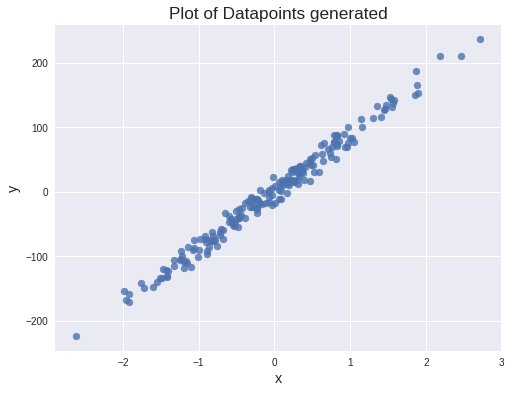

Epoch:  0
Loss =  2934.082243250548


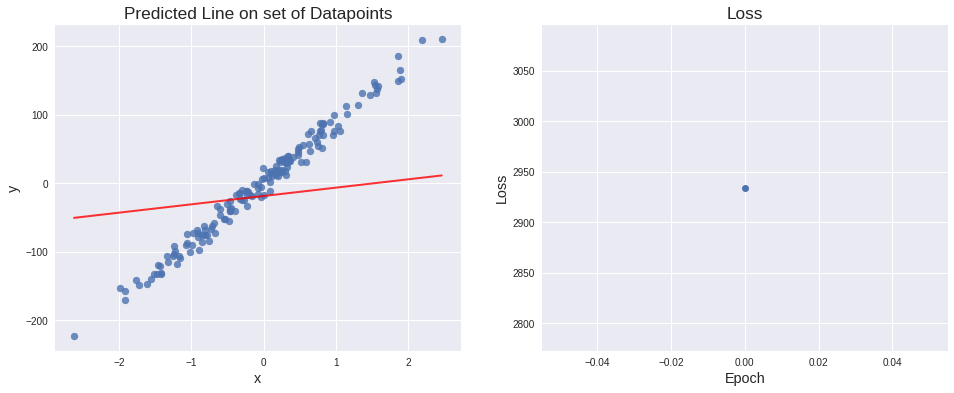

Epoch:  10
Loss =  1246.3617292447889


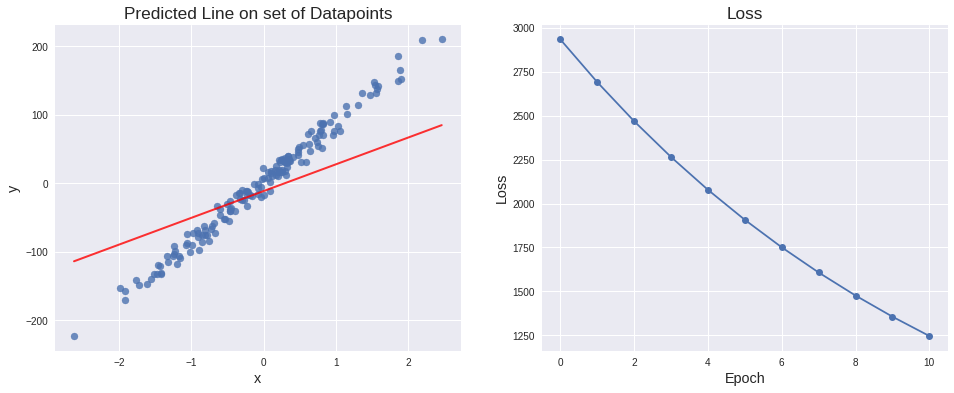

Epoch:  20
Loss =  546.310951004311


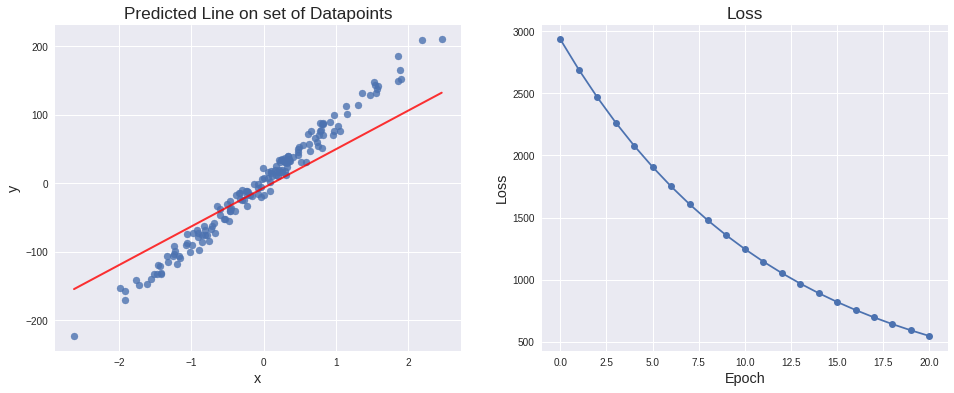

Epoch:  30
Loss =  255.88020867147344


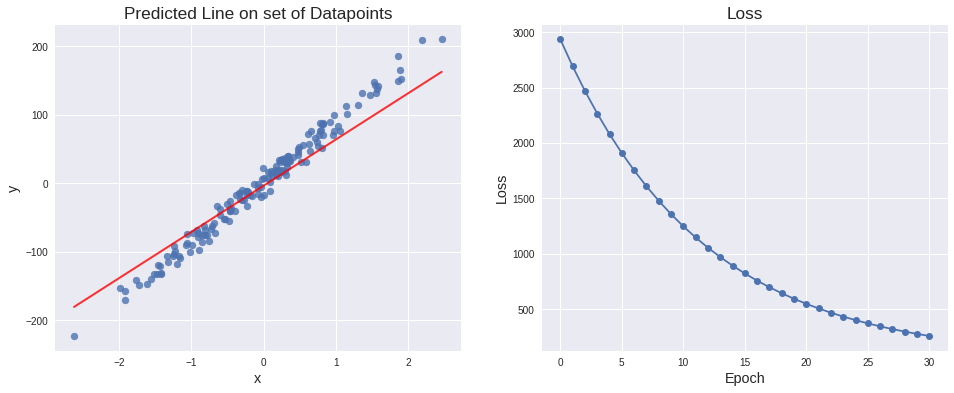

Epoch:  40
Loss =  135.36914932067438


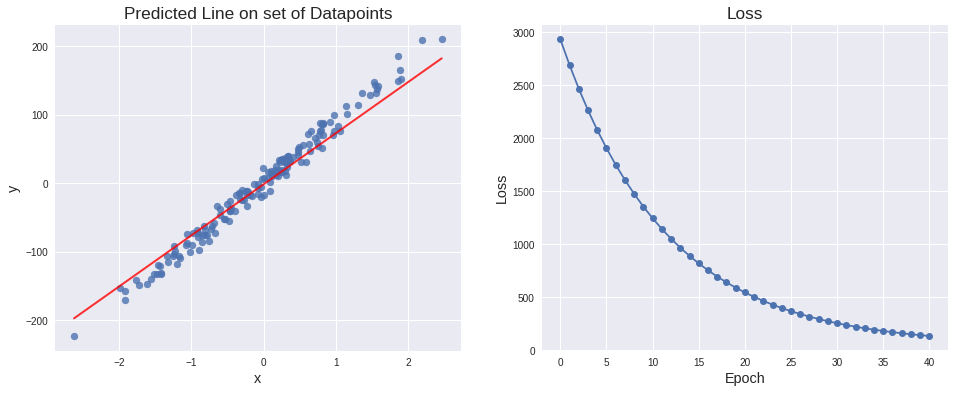

Epoch:  50
Loss =  85.35744394597806


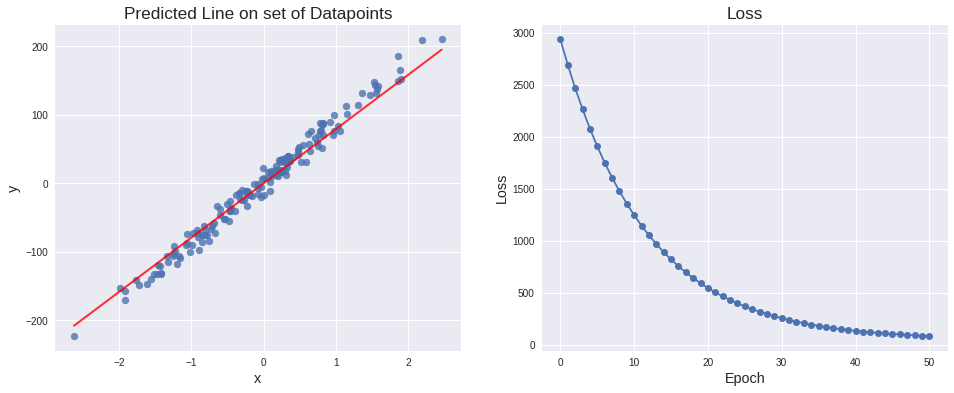

Epoch:  60
Loss =  64.60029693013243


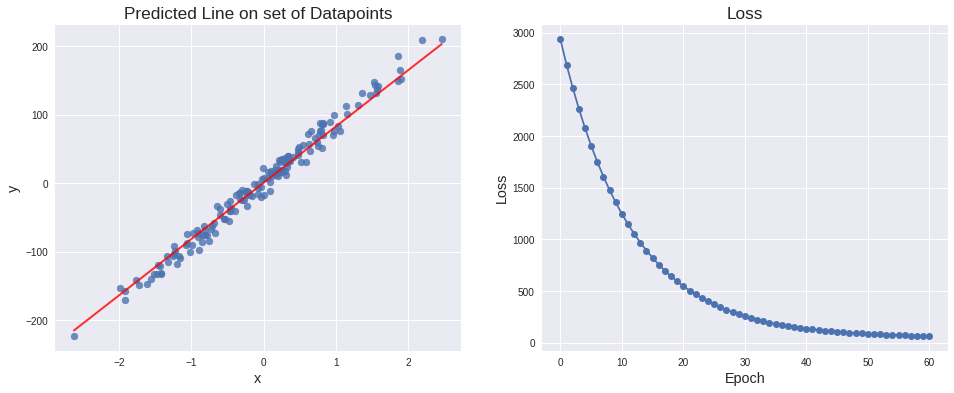

Prediction: 
Loss =  56.53060443946197
Accuracy = 80.1676%


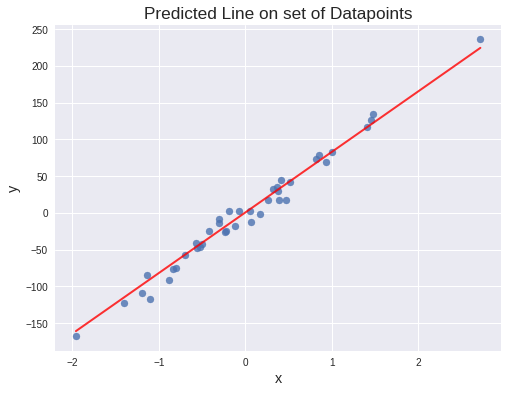

Hence 
m =  82.34083095217943
b =  0.46491578390750576


In [ ]:
X, y = make_regression(n_samples=M, n_features=n, n_informative=n, 
                         n_targets=1, random_state=42, noise=10)

dataset = {'X': X, 'y': y}

plot_graph(dataset)

m, b = init_params()

X, y = reset_sizes(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

losses = []

for i in range(epochs):
    y_pred = forward_prop(X_train, m, b)

    loss = compute_loss(y_train, y_pred)
    losses.append(loss)

    m, b = back_prop(X_train, y_train, y_pred, m, b, l_r)

    if(i%10==0):
        print('Epoch: ', i)
        print('Loss = ', loss)
        plot_pred_line(X_train, y_train, m, b, losses)

del losses[:]

## Prediction

In [ ]:
# Prediction
print('Prediction: ')
y_pred = forward_prop(X_test, m, b)
loss = compute_loss(y_test, y_pred)
print('Loss = ', loss)
accuracy = np.mean(np.fabs((y_pred - y_test) / y_test)) * 100
print('Accuracy = {}%'.format(round(accuracy, 4)))
plot_pred_line(X_test, y_test, m, b)

print('Hence \nm = ', m)
print('b = ', b)

## Two Layer Neural Neutwork with Linear Activation Function

Now, let us consider scaling this up to a 2 layer network as shown in the below figure.
<img src="https://docs.google.com/drawings/d/e/2PACX-1vQGsJESLwUjPIqrxaK4tZBsOBNuSQbzl0RKd0vL3nV8-QEf8rbP6ZqbKTszCUxdgvzcCSgl6WTQikSu/pub?w=3649&h=2880" alt="two layer network with Linear Activation Function." width="600"/>

From the image, we observe that there are two inputs each to the two neurons in the first layer and an output neuron in the second layer.

We can represent them in vector form as:
\begin{equation}
z_1^{[1]} = x.w_1^{[1]} \\ =
\begin{bmatrix}
x_0 &
x_1 &
x_2
\end{bmatrix} .
\begin{bmatrix}
w_{10}^{[1]} \\
w_{11}^{[1]} \\
w_{12}^{[1]}
\end{bmatrix}\\ 
= w_{10}^{[1]} + w_{11}^{[1]}.x_1 + w_{12}^{[1]}.x_2, \\
\end{equation}

While doing matrix computations, we'll need to take care of the dimensions and multiply. Hence, we rearrange a bit to arrive at the required output.

<br>
The expansion of the equation is not required and hence let's stick to 

\begin{equation}z_1^{[1]} = x.w_1^{[1]}\end{equation}

Similarly, the value of 

\begin{equation}
z_2^{[1]} =  x.w_2^{[1]}
\end{equation}

\begin{equation}
\therefore z^{[1]}  =
\begin{bmatrix}
z_1^{[1]} &
z_2^{[1]}
\end{bmatrix}
\end{equation}

<br>
Now the ouput from the $2^{nd}$ layer will be:
\begin{equation}
z^{[2]} =  z^{[1]}.w^{[2]} = w_{0}^{[2]} + w_{1}^{[2]}.z_1^{[1]} + w_{2}^{[2]}.z_2^{[1]} \\
= w_{0}^{[2]} + w_{1}^{[2]}.(x.w_1^{[1]}) + w_{2}^{[2]}.(x.w_2^{[1]}) \\
\implies z^{[2]} = w_0' + w_1'.x \qquad \text{[where, } w_0' \space \& \space w_1' \text{are some values]}
\end{equation}

<br><br>
From the above set of equations, we see that a neural network with a linear activation function reduces to a *linear equation*. This defeats the purpose of the whole neural network which tries to approximate to complex curves in space, so as to find the optimal solution. **Hence, it should be strictly noted that a linear function cannot be used as an activation function for the neural network,** *although it can be used only in the last layer for regression problems*.

### Conclusion

In this tutorial, you learnt
1. The concept of  perceptron and also neural networks.

2. Linear Activation functions perform the tasks of regression i.e., learn to predict and forecast values. This method is extensively called *Linear Regression* everywhere.

2. An MLP(Multi-Layer Perceptron) with a linear activation function reduces to a normal Linear Regression task. Hence, linear activations must not be used in the hiiden layers of a network. However, it can be used in the last layer for regression/prediction tasks.

In the next tutorial, you'll learn about Sigmoid Activation Function and perform Logistic Regression.